In [114]:
#import dependencies and create dataframe

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()
import sklearn
from sklearn.decomposition import PCA

from scipy.signal import savgol_filter
from sklearn.preprocessing import StandardScaler
from sklearn import linear_model
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

df = pd.read_csv('/Users/pierce/Documents/Ex 2/Experiments/Exp 2022-12-09 14-19/Outputs/merged_data.csv', index_col = 0)

print(df.shape)
df.head()

(51, 839)


,4000,3996,3992,3988,3984,3980,3976,3972,3968,3964,...,684,680,676,672,668,664,660,656,652,648
DCM 00_00_41.csv,0.020439,0.019474,0.018579,0.018284,0.018611,0.018872,0.018516,0.017831,0.017419,0.017365,...,0.372758,0.355604,0.275522,0.161891,0.141350,0.219935,0.199660,0.075134,0.043631,0.070511
DCM 00_00_56.csv,0.031897,0.031035,0.030450,0.030393,0.030619,0.030554,0.029957,0.029240,0.028946,0.029093,...,0.421900,0.375785,0.285255,0.161517,0.132766,0.151498,0.131530,0.064883,0.088977,0.137892
DCM 00_01_11.csv,0.031028,0.030421,0.029820,0.029405,0.029173,0.028801,0.028193,0.027778,0.027847,0.027970,...,0.460185,0.378685,0.280918,0.167522,0.171384,0.215488,0.162973,0.058535,0.065861,0.069618
DCM 00_01_26.csv,0.035931,0.035404,0.034714,0.034009,0.033505,0.033199,0.032942,0.032718,0.032588,0.032472,...,0.398583,0.322616,0.242263,0.135376,0.149765,0.160809,0.097987,0.032473,0.060190,0.107692
DCM 00_01_43.csv,0.026941,0.026279,0.026129,0.026067,0.025919,0.025651,0.025177,0.024573,0.024123,0.023958,...,0.435308,0.388162,0.312257,0.196912,0.133412,0.134233,0.109501,0.075529,0.119016,0.145941


In [115]:
#define test data variables
#read csv to df, only read data column, transpose
#preprocessing?

tt1 = pd.read_csv('/Users/pierce/Documents/Ex 2/Test Data/DCM 00_41_30.csv', usecols = [1])
tt2 = pd.read_csv('/Users/pierce/Documents/Ex 2/Test Data/DCM 00_44_30.csv', usecols = [1])
tt3 = pd.read_csv('/Users/pierce/Documents/Ex 2/Test Data/DCM 00_47_30.csv', usecols = [1])
tt4 = pd.read_csv('/Users/pierce/Documents/Ex 2/Test Data/DCM 00_50_31.csv', usecols = [1])
tt5 = pd.read_csv('/Users/pierce/Documents/Ex 2/Test Data/DCM 00_53_31.csv', usecols = [1])

#transpose dataframes so the data is in row not column
t1 = tt1.transpose()
t2 = tt2.transpose()
t3 = tt3.transpose()
t4 = tt4.transpose()
t5 = tt5.transpose()

frames = [t1, t2, t3, t4, t5]
testdata = pd.concat(frames)


testdata.columns = df.columns

testdata.head()

,4000,3996,3992,3988,3984,3980,3976,3972,3968,3964,...,684,680,676,672,668,664,660,656,652,648
00:41:30,-0.016415,-0.016376,-0.017271,-0.017957,-0.017337,-0.016172,-0.015922,-0.016582,-0.017037,-0.016990,...,0.170993,0.155050,0.150156,0.044089,0.040346,0.133493,0.152429,-0.059006,-0.131598,-0.073792
00:44:30,-0.018136,-0.018083,-0.018521,-0.019157,-0.019363,-0.018906,-0.018300,-0.018171,-0.018529,-0.018887,...,0.241680,0.262301,0.366038,0.229691,0.171879,0.203302,0.123909,0.027812,-0.020121,0.029903
00:47:30,-0.019376,-0.019398,-0.019374,-0.019301,-0.018864,-0.018043,-0.017521,-0.018002,-0.019307,-0.020465,...,0.182866,0.163826,0.160653,0.124220,0.086580,0.098237,0.110306,0.112620,0.102236,0.128461
0:50:31,-0.020108,-0.019654,-0.020430,-0.021877,-0.022815,-0.022739,-0.022019,-0.021137,-0.020382,-0.019990,...,0.086307,0.134346,0.182093,0.215810,0.241853,0.254294,0.071264,-0.053293,0.016895,0.111791
00:53:31,-0.022275,-0.022191,-0.022388,-0.022864,-0.022995,-0.022357,-0.021439,-0.021107,-0.021666,-0.022574,...,0.088114,0.083330,0.104025,0.066272,0.028586,0.057386,0.075141,0.089365,0.074761,0.017572


In [116]:
fulldf = pd.concat([df, testdata], axis = 0)
fulldf

,4000,3996,3992,3988,3984,3980,3976,3972,3968,3964,...,684,680,676,672,668,664,660,656,652,648
DCM 00_00_41.csv,0.020439,0.019474,0.018579,0.018284,0.018611,0.018872,0.018516,0.017831,0.017419,0.017365,...,0.372758,0.355604,0.275522,0.161891,0.141350,0.219935,0.199660,0.075134,0.043631,0.070511
DCM 00_00_56.csv,0.031897,0.031035,0.030450,0.030393,0.030619,0.030554,0.029957,0.029240,0.028946,0.029093,...,0.421900,0.375785,0.285255,0.161517,0.132766,0.151498,0.131530,0.064883,0.088977,0.137892
DCM 00_01_11.csv,0.031028,0.030421,0.029820,0.029405,0.029173,0.028801,0.028193,0.027778,0.027847,0.027970,...,0.460185,0.378685,0.280918,0.167522,0.171384,0.215488,0.162973,0.058535,0.065861,0.069618
DCM 00_01_26.csv,0.035931,0.035404,0.034714,0.034009,0.033505,0.033199,0.032942,0.032718,0.032588,0.032472,...,0.398583,0.322616,0.242263,0.135376,0.149765,0.160809,0.097987,0.032473,0.060190,0.107692
DCM 00_01_43.csv,0.026941,0.026279,0.026129,0.026067,0.025919,0.025651,0.025177,0.024573,0.024123,0.023958,...,0.435308,0.388162,0.312257,0.196912,0.133412,0.134233,0.109501,0.075529,0.119016,0.145941
DCM 00_01_57.csv,0.022867,0.021998,0.021109,0.020675,0.020766,0.020806,0.020379,0.019831,0.019667,0.019793,...,0.369347,0.334657,0.260334,0.182254,0.198325,0.200433,0.120280,0.024361,0.048740,0.112051
DCM 00_02_11.csv,0.023172,0.022652,0.022227,0.021884,0.021639,0.021442,0.021233,0.021040,0.020869,0.020550,...,0.416628,0.375098,0.259389,0.126056,0.124661,0.137110,0.089325,0.025515,0.040807,0.063547
DCM 00_02_26.csv,0.025973,0.025323,0.024613,0.024161,0.024170,0.024342,0.024191,0.023699,0.023273,0.023099,...,0.480977,0.462389,0.309193,0.136251,0.126177,0.187758,0.140907,0.032638,0.038774,0.051992
DCM 00_02_41.csv,0.020322,0.019747,0.019014,0.018340,0.017832,0.017353,0.016822,0.016403,0.016166,0.015895,...,0.396842,0.350948,0.276196,0.174312,0.155675,0.180541,0.127242,0.035079,0.070165,0.105754
DCM 00_02_56.csv,0.017708,0.017202,0.016548,0.015962,0.015808,0.015949,0.015949,0.015774,0.015667,0.015539,...,0.357096,0.336512,0.241775,0.087103,0.045300,0.074572,0.086460,0.078869,0.069047,0.067821


In [117]:
concentration = [0,2,4,6,8,10,12,14,16,18,20,22,24,26,28,30,32,34,36,38,40,42,44,46,48,50,52,54,56,58,60,62,64,66,68,70,72,74,76,78,80,82,84,86,88,90,92,94,96,98,100,None,None,None,None,None]
fulldf['Concentration'] = concentration
fulldf

,4000,3996,3992,3988,3984,3980,3976,3972,3968,3964,...,680,676,672,668,664,660,656,652,648,Concentration
DCM 00_00_41.csv,0.020439,0.019474,0.018579,0.018284,0.018611,0.018872,0.018516,0.017831,0.017419,0.017365,...,0.355604,0.275522,0.161891,0.141350,0.219935,0.199660,0.075134,0.043631,0.070511,0.0
DCM 00_00_56.csv,0.031897,0.031035,0.030450,0.030393,0.030619,0.030554,0.029957,0.029240,0.028946,0.029093,...,0.375785,0.285255,0.161517,0.132766,0.151498,0.131530,0.064883,0.088977,0.137892,2.0
DCM 00_01_11.csv,0.031028,0.030421,0.029820,0.029405,0.029173,0.028801,0.028193,0.027778,0.027847,0.027970,...,0.378685,0.280918,0.167522,0.171384,0.215488,0.162973,0.058535,0.065861,0.069618,4.0
DCM 00_01_26.csv,0.035931,0.035404,0.034714,0.034009,0.033505,0.033199,0.032942,0.032718,0.032588,0.032472,...,0.322616,0.242263,0.135376,0.149765,0.160809,0.097987,0.032473,0.060190,0.107692,6.0
DCM 00_01_43.csv,0.026941,0.026279,0.026129,0.026067,0.025919,0.025651,0.025177,0.024573,0.024123,0.023958,...,0.388162,0.312257,0.196912,0.133412,0.134233,0.109501,0.075529,0.119016,0.145941,8.0
DCM 00_01_57.csv,0.022867,0.021998,0.021109,0.020675,0.020766,0.020806,0.020379,0.019831,0.019667,0.019793,...,0.334657,0.260334,0.182254,0.198325,0.200433,0.120280,0.024361,0.048740,0.112051,10.0
DCM 00_02_11.csv,0.023172,0.022652,0.022227,0.021884,0.021639,0.021442,0.021233,0.021040,0.020869,0.020550,...,0.375098,0.259389,0.126056,0.124661,0.137110,0.089325,0.025515,0.040807,0.063547,12.0
DCM 00_02_26.csv,0.025973,0.025323,0.024613,0.024161,0.024170,0.024342,0.024191,0.023699,0.023273,0.023099,...,0.462389,0.309193,0.136251,0.126177,0.187758,0.140907,0.032638,0.038774,0.051992,14.0
DCM 00_02_41.csv,0.020322,0.019747,0.019014,0.018340,0.017832,0.017353,0.016822,0.016403,0.016166,0.015895,...,0.350948,0.276196,0.174312,0.155675,0.180541,0.127242,0.035079,0.070165,0.105754,16.0
DCM 00_02_56.csv,0.017708,0.017202,0.016548,0.015962,0.015808,0.015949,0.015949,0.015774,0.015667,0.015539,...,0.336512,0.241775,0.087103,0.045300,0.074572,0.086460,0.078869,0.069047,0.067821,18.0


In [118]:
#define training variables
#define X variable and confirm it's shape

#X needs to emcompass all data for preprocessing and PCA
#will be broken into labelled and unlabelled data later
X = fulldf.values[:,:-1]
print(X.shape)

#define y
y = fulldf.values[:-5,-1]

#define prediction values

(56, 839)


In [119]:
# Preprocessing (1): first derivative
d1X = savgol_filter(X, 51, polyorder = 5, deriv=1)

# Preprocess (2) Standardize features by removing the mean and scaling to unit variance
Xstd = StandardScaler().fit_transform(d1X[:,:])

In [120]:
#create PCA and print the explained variance ratios and sums

pca_all = PCA(n_components= 30, random_state = 2020)
#random_state is a seed to stop randomness from changing results across trials - just used a random number
#n_components is set to 51 - which is the max. This is the same as leaving it blank (default)
#setting n_components as int tells the function how many components to include
pca_all_fitted = pca_all.fit(X)
print(pca_all_fitted.explained_variance_ratio_)
print(sum(pca_all_fitted.explained_variance_ratio_ * 100))

pca = PCA(n_components = 30, random_state = 2020)
Xfit = pca.fit(X)
#Setting n_components as float tells the function to include as many components as necessary to explain the float level of variance
Xreg = pca.fit_transform(Xstd)
print(pca.explained_variance_ratio_)
print(sum(pca.explained_variance_ratio_ * 100))
print(len(pca.components_))



[9.39008833e-01 4.15847678e-02 1.05397276e-02 2.40472864e-03
 1.19663313e-03 8.10977967e-04 7.58213139e-04 5.45379804e-04
 4.52086600e-04 3.28412077e-04 2.78145904e-04 2.54720851e-04
 2.10590081e-04 1.94037860e-04 1.64124429e-04 1.51237954e-04
 1.24276906e-04 1.19267727e-04 1.05108967e-04 8.44059315e-05
 7.55925634e-05 6.45575615e-05 6.30640455e-05 5.73473855e-05
 4.43902423e-05 4.31969834e-05 3.78514157e-05 3.18553179e-05
 2.91977307e-05 2.60604204e-05]
99.97887896278253
[0.55324577 0.12157934 0.05600933 0.03483895 0.03049011 0.02665833
 0.02019617 0.01651321 0.01362869 0.01155427 0.01124209 0.00996452
 0.00938624 0.00863407 0.00737176 0.00682448 0.00633049 0.00539394
 0.00496831 0.00454837 0.00379628 0.00338978 0.0032701  0.00272241
 0.00262904 0.00239937 0.0022525  0.00205803 0.00187077 0.00161666]
98.53833455236811
30


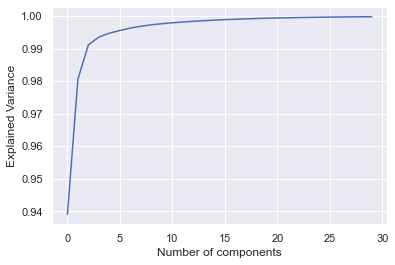

In [121]:
#plot explained variance ratio vs n components
plt.plot(np.cumsum(pca_all.explained_variance_ratio_))
plt.xlabel('Number of components')
plt.ylabel('Explained Variance')
plt.savefig('elbow_plot.png', dpi=100)

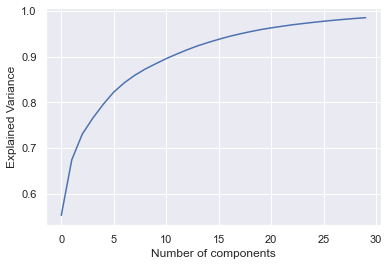

In [122]:
#plot explained variance ratio vs n components
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('Number of components')
plt.ylabel('Explained Variance')
plt.savefig('elbow_plot.png', dpi=100)

In [123]:
print("Variance explained by the first principal component: ",
     np.cumsum(pca_all.explained_variance_ratio_*100)[0])

print("Variance explained by the first ten principal component: ",
     np.cumsum(pca_all.explained_variance_ratio_*100)[9])

Variance explained by the first principal component:  93.90088326098797
Variance explained by the first ten principal component:  99.76297593519242


In [124]:
#break Xreg into labelled and unlabelled data
#assume PCA array is ordered - AKA array rows correspond to dataframe rows
#if model is fucked, investigate further

print(Xreg.shape)

Xlab = Xreg[:-5,:]
print(Xlab.shape)
Xpred = Xreg[-5:,:]
print(Xpred.shape)

np.savetxt("Xreg.csv", Xreg, delimiter=",")

(56, 30)
(51, 30)
(5, 30)


In [125]:
# Create linear regression object 
regr = linear_model.LinearRegression() 
# Fit 
regr.fit(Xlab, y) 
# Calibration 
y_c = regr.predict(Xlab) 
# Cross-validation 
y_cv = cross_val_predict(regr, Xlab, y, cv=10) 
# Calculate scores for calibration and cross-validation 
score_c = r2_score(y, y_c) 
score_cv = r2_score(y, y_cv)
# Calculate mean square error for calibration and cross validation 
mse_c = mean_squared_error(y, y_c) 
mse_cv = mean_squared_error(y, y_cv)

#Calculate root mean squared error for calibration and cross validation
rmse_c = mean_squared_error(y, y_c, squared= False)
rmse_cv = mean_squared_error(y, y_cv, squared= False)

#Calculate mean absolute error for calibration and cross validation
mae_c = mean_absolute_error(y,y_c)
mae_cv = mean_absolute_error(y,y_cv)

#return(y_cv, score_c, score_cv, mse_c, mse_cv)
print(y_c)
print(y_cv)
print('Calibration R^2:\n', score_c)
print('Calibration MSE\n', mse_c)
print('Calibration RMSE\n', rmse_c)
print('Calibration MAE\n', mae_c)

print('Cross-Validation R^2:\n', score_cv)
print('Cross-Validation MSE\n', mse_cv)
print('Cross_Validation RMSE\n', rmse_cv)
print('Cross_Validation MAE\n', mae_cv)

[  6.19008595   3.09154635   3.70746236   3.86949223   7.9649314
  12.60939088  12.12179626  11.18522499  16.3590315   15.51046126
  19.93037927  21.58129659  24.99672709  25.63179321  27.20630179
  29.06994551  32.25110831  32.93365834  37.22468976  38.13923831
  38.70269378  40.44325926  43.78213493  43.07113744  46.54303027
  51.78300004  52.99240135  56.71333968  56.30710865  56.88082571
  60.05040142  63.54103684  66.02174866  67.13297642  68.75006245
  69.70230075  70.71497083  72.19889599  78.55705391  76.69197845
  79.10898679  81.30400293  82.09026652  87.0737326   90.01346295
  86.06514096  93.50504873  93.69959013  96.56606831  98.38105784
 100.03772405]
[ 19.59753745  16.88289633  13.28293276  15.66788743  13.4225904
  17.1179006    9.34466726   4.5133038   14.04819061   8.47265094
  18.38803484  21.1559136   27.24218735  25.41525902  24.89485168
  27.8903187   29.93524024  31.18605869  38.36532325  39.35171257
  34.734825    33.14553802  43.87038745  37.64401622  43.084023

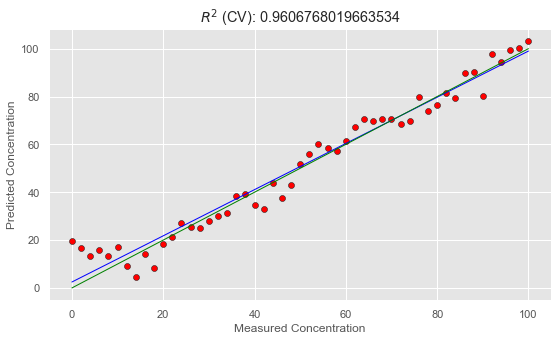

In [126]:
#predicted, r2r, r2cv, mser, mscv = pcr(X,y, pc=6)
 
# Regression plot
z = np.polyfit(y, y_cv, 1)
with plt.style.context(('ggplot')):
    fig, ax = plt.subplots(figsize=(9, 5))
    ax.scatter(y, y_cv, c='red', edgecolors='k')
    ax.plot(y, z[1]+z[0]*y, c='blue', linewidth=1)
    ax.plot(y, y, color='green', linewidth=1)
    plt.title('$R^{2}$ (CV): '+str(score_cv))
    plt.xlabel('Measured Concentration')
    plt.ylabel('Predicted Concentration')
    plt.show()
    
#not sure if this is plotting the right shit...
#double check this lmao

In [127]:
regr.predict(Xpred)

array([106.05220642,  77.12422281, 105.72001497, 114.15935244,
       128.72703479])